[toc]

### 1. Loading Data

In [1]:
library(tidyverse)
library(fields)
library(gplots)

── Attaching packages ────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: spam

Loading required package: dotCall64

Loading required package: grid

Spam version 2.7-0 (2021-06-25) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: viridis

Loading required package: viridisLite

See https://github.com/NCAR/Fields for
 an extensive vignette, other

In [40]:
dat <- read.csv("Vaccine_Hesitancy_for_COVID-19__County_and_local_estimates.csv")[,c(1:19)]

## 2. Hesitancy distribution Over all Counties in Amarica
### Plot

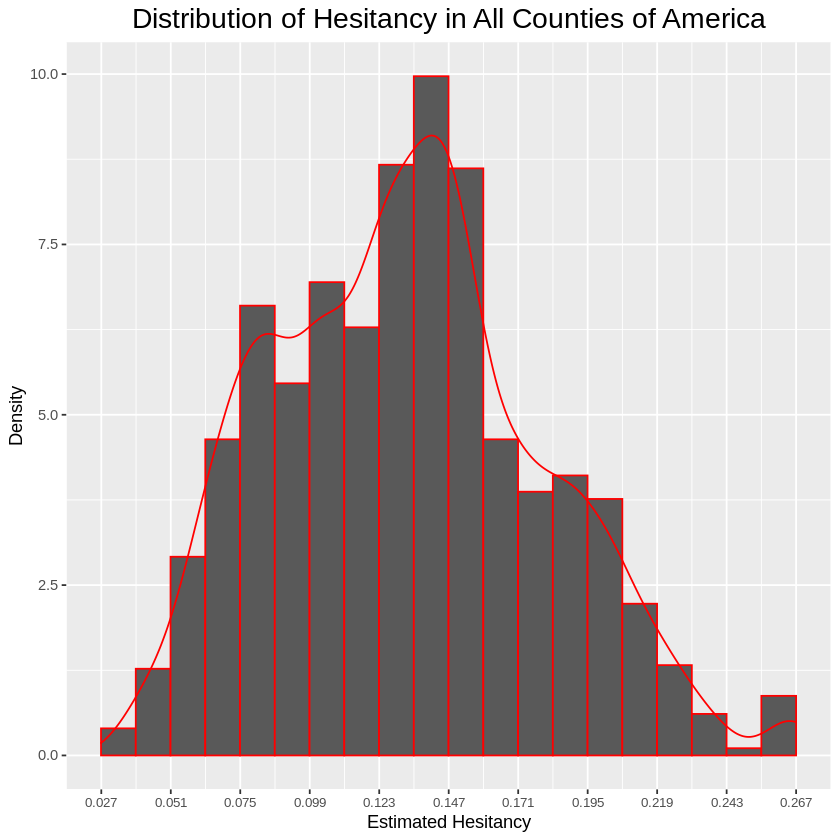

In [58]:
dat %>%
ggplot(aes(x=Estimated.hesitant,
               y= ..density..)#Generate the density of the rainfall.
           ) + 
        geom_histogram(breaks=seq(min(dat$Estimated.hesitant), 
                                max(dat$Estimated.hesitant),
                                by=(max(dat$Estimated.hesitant)-min(dat$Estimated.hesitant))/20
                                ),
                     col = "red"
                     )+
        scale_x_continuous(breaks = round(seq(min(dat$Estimated.hesitant), 
                                max(dat$Estimated.hesitant),
                                by=(max(dat$Estimated.hesitant)-min(dat$Estimated.hesitant))/10
                                ),3))+
        geom_density(col="red"
                   )+
        labs(title = "Distribution of Hesitancy in All Counties of America",
           #subtitle = "Estimated Hesitancy",
             x = "Estimated Hesitancy",
           #caption = "My 3B plot",
             y="Density"
           )+
        theme(plot.title=element_text(size=17, 
                                    hjust=.5, 
                                    lineheight=1.2),
            #plot.subtitle = element_text(size = 7,
                                         #hjust=.5),
            #plot.caption = element_text(size = 7),
            axis.text.x = element_text(size=8)
            )

### Joint MLE
For the distribution of all counties
Draw a contour pplot of the joint log\-likelihood mu and sigma.
**This is a Log-likelihood Estimation, therefore, the lower the better.**

In [3]:
#log-likelihood

#data
dat_vec  <- 
    dat %>% 
    select(Estimated.hesitant) %>%
    drop_na()

#Initialization   
mu_min=.01;mu_max=.3;sig_min=0.01;sig_max=0.06
mu <- seq(mu_min,mu_max,length=100)
sigma <- seq(sig_min,sig_max,length=100)
like <- matrix(rep(0,10000),ncol=100)

#Calculate the likelihood.
for (i in 1:100){
    for (j in 1:100){
        like[i,j]=sum((dat_vec-mu[i])^2) / (2*sigma[j]^2)+nrow(data.frame(dat_vec))*log(sigma[j])
    } 
}
like <- like/max(like) #Normalize it.

In [132]:
# MLE
print(mu[which(like==min(like),arr.ind=TRUE)[1]])
print(sigma[which(like==min(like),arr.ind=TRUE)[2]])

[1] 0.1330303
[1] 0.04636364


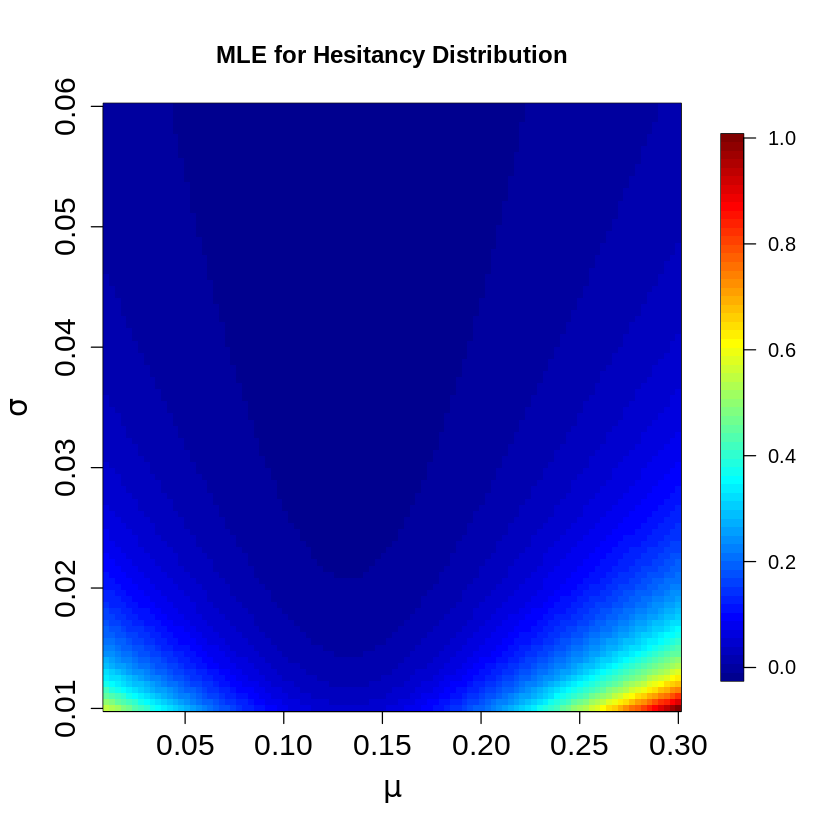

In [4]:
image.plot(mu,sigma,like,
             xlab=expression(mu),ylab=expression(sigma),main="MLE for Hesitancy Distribution",
               cex.lab=1.5,cex.axis=1.5)

## 3. Analysis in Groups

### Distribution

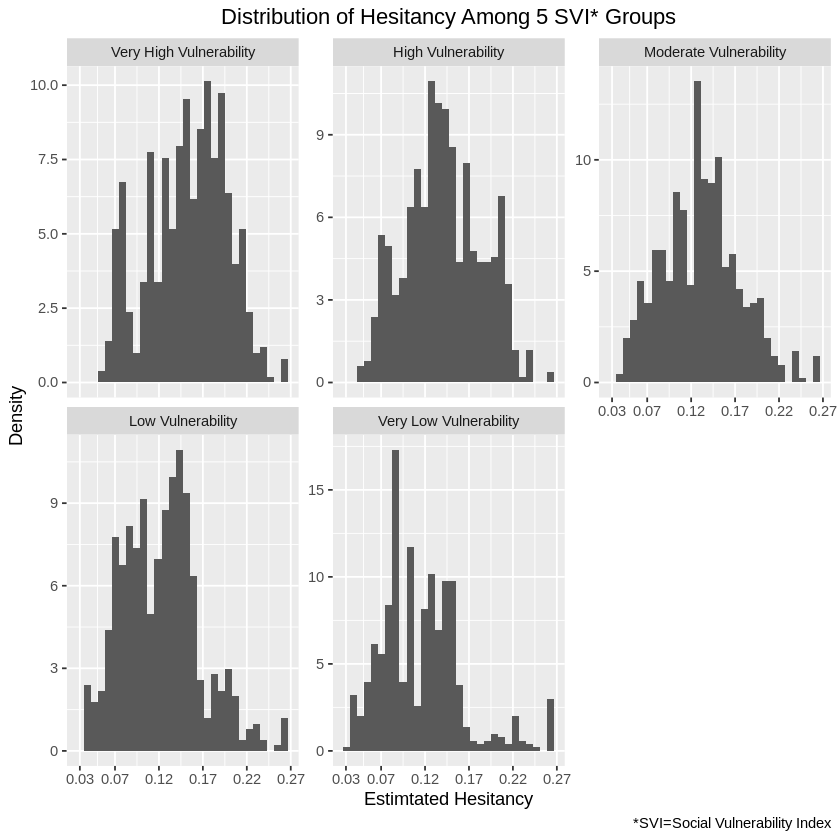

In [51]:
# Reorder the labels
dat$SVI.Category <- 
    dat$SVI.Category %>%
    as.character() %>%
    factor(levels=c( 'Very High Vulnerability', 'High Vulnerability', 
                    'Moderate Vulnerability','Low Vulnerability','Very Low Vulnerability'),
            ordered=TRUE)
# Distribution ploting
dat %>%
filter(dat$SVI.Category != "") %>%
select(Estimated.hesitant,SVI.Category) %>%
  ggplot(aes(Estimated.hesitant,y=..density..))+
  geom_histogram(breaks=seq(min(dat$Estimated.hesitant), 
                            max(dat$Estimated.hesitant),
                            by=(max(dat$Estimated.hesitant)-min(dat$Estimated.hesitant))/30
                                )
                     ) +
    # Adjusting the scale of x-axis.
    scale_x_continuous(breaks = round(seq(min(dat$Estimated.hesitant), 
                                max(dat$Estimated.hesitant),
                                by=(max(dat$Estimated.hesitant)-min(dat$Estimated.hesitant))/5
                                ),2)
                         ) +
  facet_wrap(SVI.Category ~ .,scales="free_y",ncol = 3)+
  labs(title = "Distribution of Hesitancy Among 5 SVI* Groups",
   #    subtitle = "Rainfall generally remain stable in consecutive years in each city, except for several particular\n years (2015 in Brisbane, 2016 in Canberra, 2017 in Melbourne, 2019 in Perth and 2015 and 2016 in Sydney).",
       caption = "*SVI=Social Vulnerability Index",
       y="Density",
       x="Estimtated Hesitancy")+
  theme(plot.title = element_text(hjust = 0.5),
       plot.subtitle = element_text(hjust = .5,
                                     size = 8))

### Summary

In [52]:
dat %>%
    filter(dat$SVI.Category != "") %>%
    group_by(SVI.Category) %>% 
    summarise(number=n(),mean=mean(Estimated.hesitant),variance=var(Estimated.hesitant))

SVI.Category,number,mean,variance
<ord>,<int>,<dbl>,<dbl>
Very High Vulnerability,629,0.1525963,0.001951066
High Vulnerability,628,0.1412575,0.001873559
Moderate Vulnerability,628,0.1310576,0.001949780
Low Vulnerability,628,0.1228255,0.001966581
Very Low Vulnerability,628,0.1153463,0.002131273


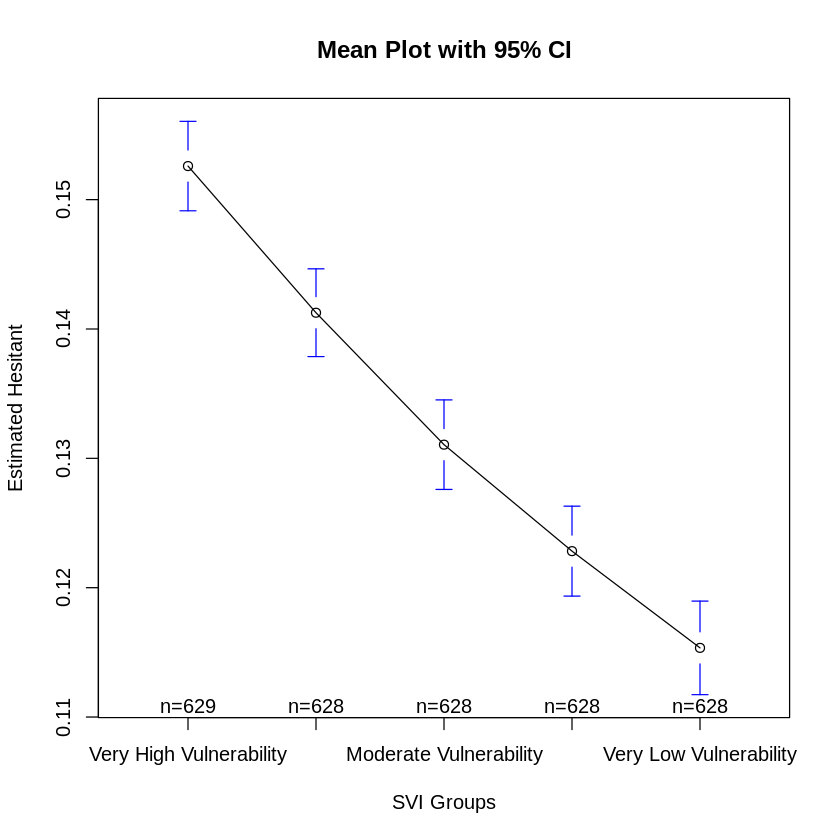

In [57]:
plotmeans(dat$Estimated.hesitant ~ dat$SVI.Category, 
          xlab = "SVI Groups", 
          ylab = "Estimated Hesitant", 
          main = "Mean Plot with 95% CI")

### ANOVA test:
Analyzing hesitancies among difference between SVI groups

In [54]:
fit <- aov(Estimated.hesitant ~ SVI.Category, data=dat)
summary(fit)

               Df Sum Sq Mean Sq F value Pr(>F)    
SVI.Category    4  0.547 0.13675   69.26 <2e-16 ***
Residuals    3136  6.192 0.00197                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
1 observation deleted due to missingness